## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata)
print(study_results)

# Combine the data into a single dataset

mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID" )

# Display the data table for preview
mouse_study_df

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = len(mouse_study_df["Mouse ID"].unique())
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])

# Using .df.loc[] to retrieve mouse ID's for duplicate mice.
mouse_duplicate_ids = mouse_study_df.loc[mouse_duplicates, 'Mouse ID'].unique()
mouse_duplicate_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_duplicates_df = mouse_study_df.loc[mouse_study_df["Mouse ID"]=="g989", :]
mouse_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_drop_index = mouse_duplicates_df.index
mouse_study_unique = mouse_study_df.drop(mouse_drop_index)
mouse_study_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_unique["Mouse ID"].unique())

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_group = mouse_study_df.groupby(["Drug Regimen"])
tumorVol_mean = mouse_study_group["Tumor Volume (mm3)"].mean()
tumorVol_median = mouse_study_group["Tumor Volume (mm3)"].median()
tumorVol_variance = mouse_study_group["Tumor Volume (mm3)"].var()
tumorVol_std = mouse_study_group["Tumor Volume (mm3)"].std()
tumorVol_SE = mouse_study_group["Tumor Volume (mm3)"].sem()

Regimen_Tumor_stats = pd.DataFrame({
                            "Tumor mean": tumorVol_mean,
                            "Tumor median": tumorVol_median,
                            "Tumor variance": tumorVol_variance,
                            "Tumor STD": tumorVol_std,
                            "Tumor SE(M)": tumorVol_SE
                        })
Regimen_Tumor_stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Tumor mean,Tumor median,Tumor variance,Tumor STD,Tumor SE(M)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Regimen_Tumor_stats_agg = mouse_study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
Regimen_Tumor_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Measurements of each Regimen')

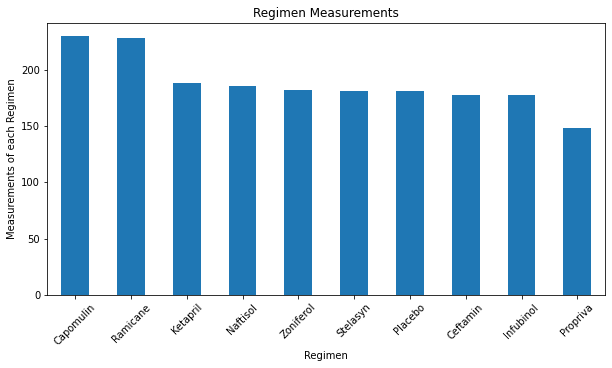

In [69]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = mouse_study_unique["Drug Regimen"].value_counts()
regimen_count.plot(kind = "bar", title = "Regimen Measurements", rot=45, figsize=(10,5))
plt.xlabel("Regimens")
plt.ylabel("Measurements of each Regimen")


Text(0.5, 1.0, 'Regimen Measurements')

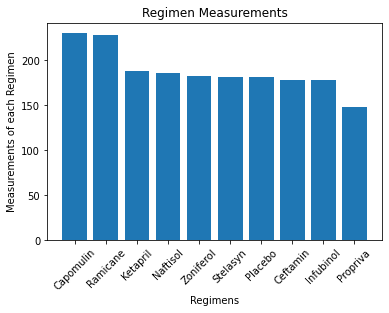

In [68]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimen_count.index.values, regimen_count.values, align = "center")
plt.xticks(rotation=45)
plt.xlabel("Regimens")
plt.ylabel("Measurements of each Regimen")
plt.title("Regimen Measurements")



<AxesSubplot:ylabel='Sex'>

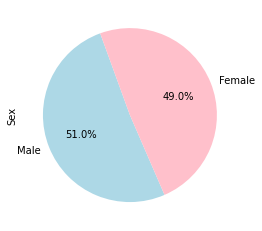

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = mouse_study_unique["Sex"].value_counts()
colors = ['lightblue', 'pink']
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=110, colors=colors)


(-1.201530633158663,
 1.1312174330404325,
 -1.1415157448888633,
 1.1319276838098218)

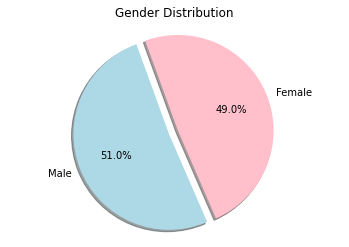

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution.values, labels=gender_distribution.index.values, explode=(0.1,0), autopct='%1.1f%%',
        colors=colors, shadow=True, startangle=110)
plt.title("Gender Distribution")
plt.axis("equal")



## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_timepoint_group = mouse_study_unique.groupby("Drug Regimen")



# final_regimen = regimen_timepoint_group.max()
final_regimens_df = pd.DataFrame(regimen_timepoint_group["Timepoint"].max())

# Start by getting the last (greatest) timepoint for each mouse
selected_final_regimens_df = final_regimens_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], :]
selected_final_regimens_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
selected_final_regimen_tumorVol = pd.merge(selected_final_regimens_df, mouse_study_unique, on=("Drug Regimen", "Timepoint"), how="left")
selected_final_regimen_tumorVol

,Drug Regimen,Timepoint,Mouse ID,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,45,s185,Female,3,17,23.343598,1
1,Capomulin,45,x401,Female,16,15,28.484033,0
2,Capomulin,45,m601,Male,22,17,28.430964,1
3,Capomulin,45,u364,Male,18,17,31.023923,3
4,Capomulin,45,y793,Male,17,17,31.896238,2
...,...,...,...,...,...,...,...,...
58,Ceftamin,45,w151,Male,24,25,67.527482,3
59,Ceftamin,45,x581,Female,19,28,64.634949,3
60,Ceftamin,45,x822,Male,3,29,61.386660,3
61,Ceftamin,45,y769,Female,6,27,68.594745,4


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Capomulin = selected_final_regimen_tumorVol.loc[selected_final_regimen_tumorVol["Drug Regimen"]=="Capomulin", "Tumor Volume (mm3)"]
# Capomulin
# Create empty list to fill with tumor vol data (for plotting)

for regimen in regimens:
    regimen_vol = selected_final_regimen_tumorVol.loc[selected_final_regimen_tumorVol["Drug Regimen"]==regimen, "Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    Q1 = regimen_vol.quantile(0.25)
    Q3 = regimen_vol.quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - (1.5*IQR)
    upperBound = Q3 - (1.5*IQR)
    outliers = regimen_vol.loc[(regimen_vol < lowerBound) | (regimen_vol > upperBound)]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    print(f"{regimen}'s potential outliers: {outliers}")
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: 3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     37.311846
9     36.041047
10    37.074024
11    38.846876
12    38.939633
13    38.982878
14    38.125164
15    40.658124
16    40.159220
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 22    29.128472
23    30.276232
24    30.564625
25    30.638696
26    31.560470
27    31.095335
28    33.397653
29    32.978522
30    33.562402
31    36.134852
32    38.810366
33    37.225650
34    36.374510
35    37.311236
36    38.407618
37    40.659006
38    40.667713
39    45.220869
40    43.047543
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: 41    67.973419
42    65.525743
43    66.083066
44    72.226731
45    62.435404
46    60.918767
47    66.196912
48    67.685569
49    62.754451
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: 50    62.999356

ValueError: Dimensions of labels and X must be compatible

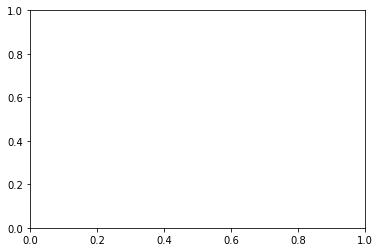

In [125]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(regimen_vol, labels=regimens, flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
